In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [9]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [10]:
movies_metadata = catalog.load("movies_metadata")

print(movies_metadata.head())

[11/01/25 13:03:39] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=593538;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=128276;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

[11/01/25 13:03:40] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=800607;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=688067;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Accuracy: 0.6566233076718875

Clasificación:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69     11721
           1       0.66      0.58      0.62     10881

    accuracy                           0.66     22602
   macro avg       0.66      0.65      0.65     22602
weighted avg       0.66      0.66      0.65     22602



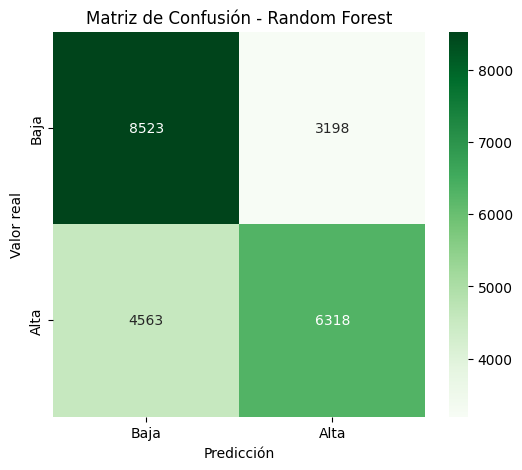

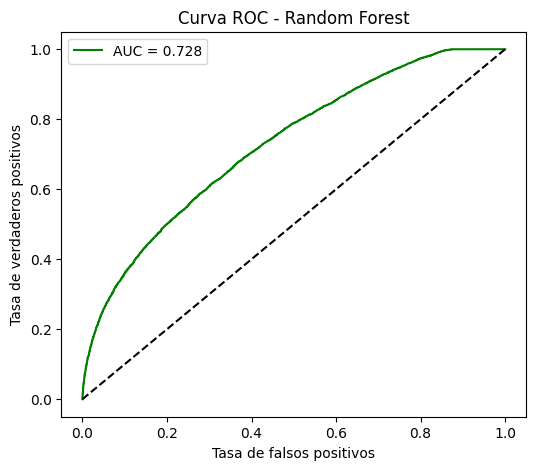

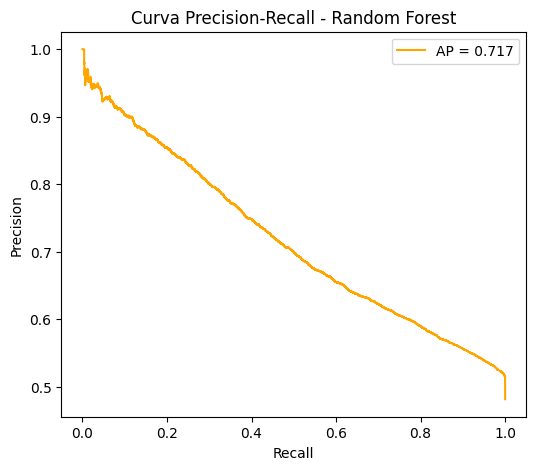

In [11]:
# Importaciones
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# Crear la variable objetivo 'high_rating'
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# Seleccionar las variables más correlacionadas 
selected_features = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[selected_features] = movies_metadata[selected_features].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
movies_metadata = movies_metadata.dropna(subset=selected_features + ['high_rating'])

# Definir X e y
X = movies_metadata[selected_features]
y = movies_metadata['high_rating']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo Random Forest
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Métricas de rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend()
plt.show()



 Top 8 variables más correlacionadas con 'vote_average':
high_rating    0.664936
runtime        0.158146
popularity     0.153334
vote_count     0.123651
revenue        0.083768
budget         0.072900
Name: vote_average, dtype: float64


[11/01/25 13:03:48] WARNING  C:\Users\ariel\AppData\Local\Temp\ipykernel_16196\2793913486.py:20:    warnings.py:110
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')                 
                                                                                                                   

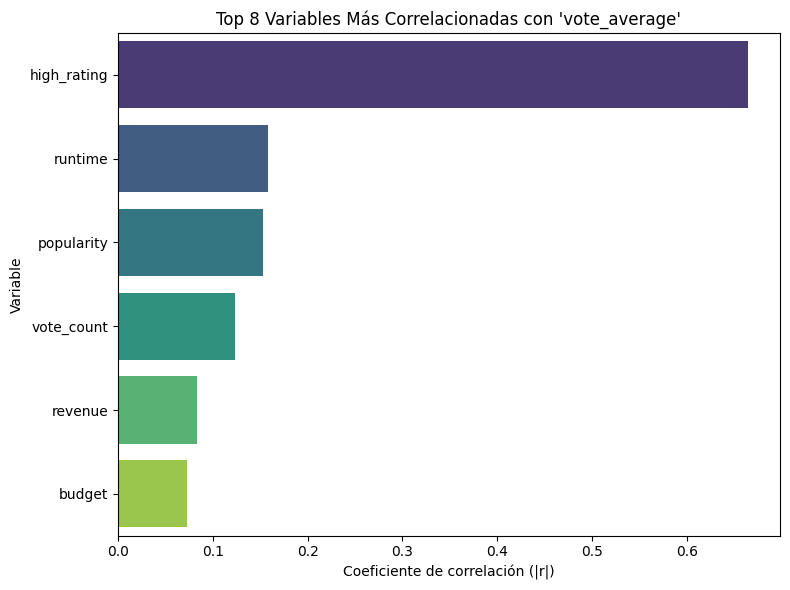

In [12]:
# Correlación con 'vote_average'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas numéricas
numeric_cols = movies_metadata.select_dtypes(include=['float64', 'int64']).columns

# Calcular correlaciones con 'vote_average'
corr = movies_metadata[numeric_cols].corr()['vote_average'].sort_values(ascending=False)

# Mostrar las 8 variables con mayor correlación (positiva o negativa)
top_corr = corr.drop('vote_average').abs().sort_values(ascending=False).head(8)

print(" Top 8 variables más correlacionadas con 'vote_average':")
print(top_corr)

# Visualización
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top 8 Variables Más Correlacionadas con 'vote_average'")
plt.xlabel("Coeficiente de correlación (|r|)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()



In [13]:
# Revisar columnas
print(movies_metadata.columns)

# Crear main_genre
import ast

def get_main_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name']  
        else:
            return None
    except:
        return None

movies_metadata['main_genre'] = movies_metadata['genres'].apply(get_main_genre)

# Revisar si se creó correctamente
print(movies_metadata[['genres', 'main_genre']].head())

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'high_rating'],
      dtype='object')
                                              genres main_genre
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  Animation
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  Adventure
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...    Romance
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...     Comedy
4                     [{'id': 35, 'name': 'Comedy'}]     Comedy


[11/01/25 13:04:20] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=802855;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=885155;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Fitting 3 folds for each of 16 candidates, totalling 48 fits

Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy final: 0.650591748700365

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      4621
           1       0.66      0.58      0.62      4420

    accuracy                           0.65      9041
   macro avg       0.65      0.65      0.65      9041
weighted avg       0.65      0.65      0.65      9041



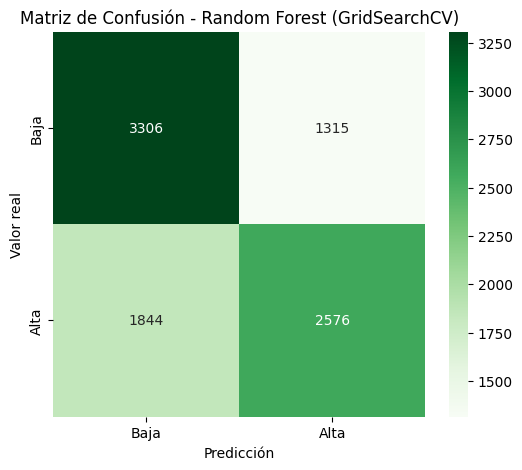

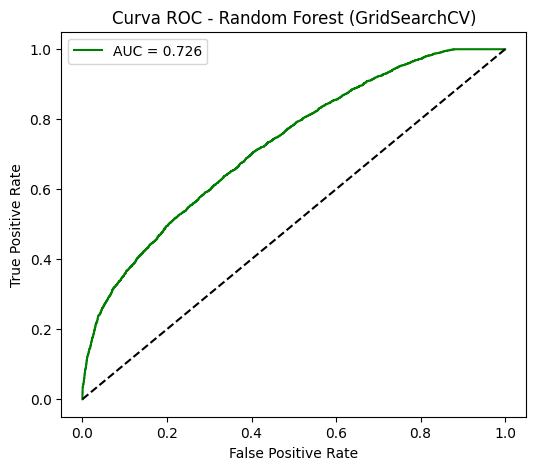

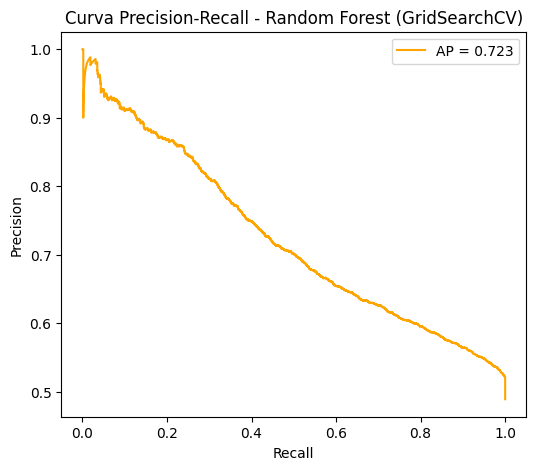


Importancia de las variables:
     Variable  Importancia
2  vote_count     0.418161
0     runtime     0.281858
1  popularity     0.161394
4      budget     0.086332
3     revenue     0.052255


[11/01/25 13:05:05] WARNING  C:\Users\ariel\AppData\Local\Temp\ipykernel_16196\3407955662.py:118:   warnings.py:110
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='Importancia', y='Variable', data=importances,                        
                             palette='viridis')                                                                    
                                                                                                                   

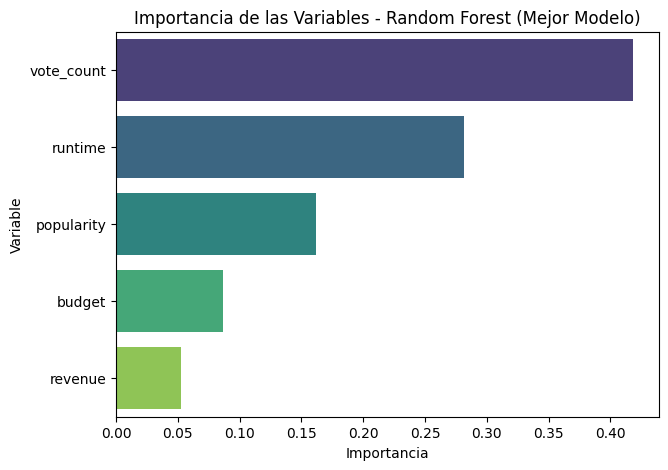

In [14]:
# Importaciones GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# Crear la variable objetivo 'high_rating'
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# Seleccionar las variables más correlacionadas
selected_features = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[selected_features] = movies_metadata[selected_features].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores nulos
movies_metadata = movies_metadata.dropna(subset=selected_features + ['high_rating'])

# Definir X e y
X = movies_metadata[selected_features]
y = movies_metadata['high_rating']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelo base
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Grilla de hiperparámetros 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Modelo final con mejores parámetros
best_rf = grid_search.best_estimator_

# Evaluación del modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)
y_scores = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nAccuracy final:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Random Forest (GridSearchCV)')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest (GridSearchCV)')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest (GridSearchCV)')
plt.legend()
plt.show()

# Importancia de las variables
importances = pd.DataFrame({
    'Variable': selected_features,
    'Importancia': best_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de las variables:")
print(importances)

plt.figure(figsize=(7,5))
sns.barplot(x='Importancia', y='Variable', data=importances, palette='viridis')
plt.title('Importancia de las Variables - Random Forest (Mejor Modelo)')
plt.show()



Conclusiones 
Resultados del Modelo

El modelo Random Forest, optimizado mediante GridSearchCV, obtuvo un rendimiento sólido y equilibrado en la predicción de si una película tiene una alta o baja puntuación (high_rating):

Accuracy: 65.06% – nivel aceptable de precisión general.
Precision: 64% para películas con baja puntuación, 66% para películas con alta puntuación.
Recall: 72% para clase 0 (baja puntuación) y 58% para clase 1 (alta puntuación).
F1-Score: 0.68 y 0.62 respectivamente, con un promedio general de 0.65.

Fortalezas del Modelo
Rendimiento estable: Accuracy y F1-score equilibrados en ambas clases.
Generalización adecuada: mantiene un rendimiento similar entre entrenamiento y prueba.
Importancia de variables clara: variables como vote_count, popularity, y runtime tuvieron mayor influencia en la predicción.
Optimización efectiva: GridSearchCV permitió ajustar los parámetros para lograr un mejor equilibrio entre profundidad y cantidad de árboles.

Conclusión Final:
El modelo Random Forest logró una precisión global del 65%, con métricas balanceadas entre ambas clases.
Aunque no alcanza niveles sobresalientes de exactitud, demuestra una buena capacidad para generalizar y detectar patrones relevantes en los datos de películas.